In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style("whitegrid")

In [9]:
def make3(init):
    return [init + 3*i for i in range(10)]

In [10]:
def il(str):
    res = []
    for ele in str.split('/'):
        res.append([float(e) for e in ele.split('+')])
    if len(res) == 1:
        return res[0]
    else:
        return res

# 使用惠斯通电桥测量铜电阻

In [11]:
def b_bridge(Us, R1, R2, _R3_l, _t_l):
    alpha_0 = 0.00428
    K = R1 / R2
    R3_l = np.array(_R3_l)
    Rx_l = R3_l * K
    t_l = np.array(_t_l)
    item_list = [t_l, R3_l, Rx_l]
    item_name = ['温度', 'R_3测量值', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`b_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `_R3_l` : R3测量值数列
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`


数据	温度	    R_3测量值	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	30.00	    564.20	    56.42	    
#1	33.00	    570.40	    57.04	    
#2	36.00	    576.60	    57.66	    
#3	39.00	    582.70	    58.27	    
#4	42.00	    588.70	    58.87	    
#5	45.00	    594.80	    59.48	    
#6	48.00	    601.00	    60.10	    
#7	51.00	    607.10	    60.71	    
#8	54.00	    613.20	    61.32	    
#9	57.00	    619.40	    61.94	    
---------------------------------------------------------------------------------------------------------------
R = 0.2040t + 50.306
R = 50.306 * (1 + 0.004056t)
不确定度 U_alpha = 5.2%


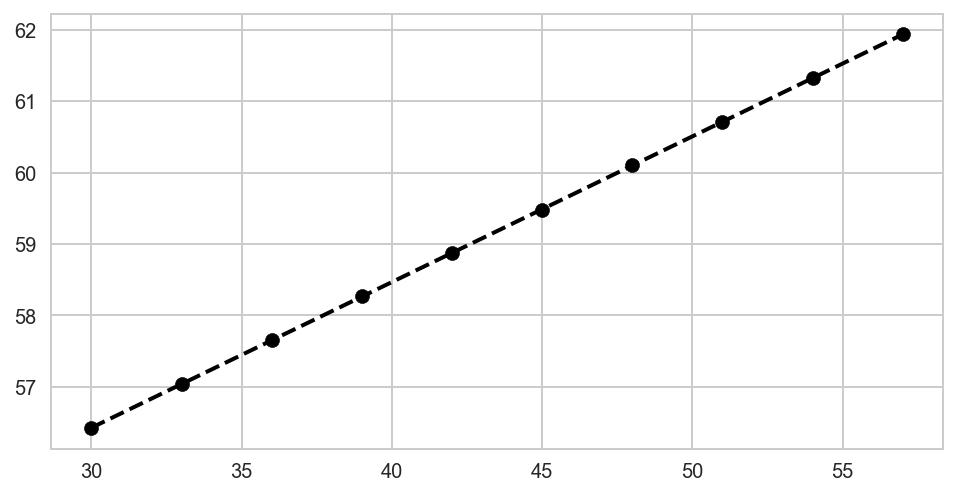

In [12]:
b_data = {
    'Us'    : 5, 
    'R1'    : 100,
    'R2'    : 1000,
    '_R3_l' : il("564.2+570.4+576.6+582.7+588.7+594.8+601.0+607.1+613.2+619.4"), 
    '_t_l'  : make3(30)
}
b_bridge(**b_data)

# 使用卧式电桥测量铜电阻

In [13]:
def l_bridge(Us, R2, R3, R1_0, _t_l, _U_l):
    alpha_0 = 0.00428
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    d_Rx = 4 * R1_0 * U_l * 10**-3 / Us
    Rx_l = np.round(R1_0 + d_Rx, 2)
    item_list = [t_l, U_l, d_Rx, Rx_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("R_0 = %.3f, alpha = %f" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R2` : R2阻值
3. `R3` : R3阻值
4. `R1_0` : R1初始测量值
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	30.00	    0.00	    0.00	    56.30	    
#1	33.00	    3.40	    0.59	    56.89	    
#2	36.00	    6.60	    1.14	    57.44	    
#3	39.00	    10.00	    1.73	    58.03	    
#4	42.00	    13.30	    2.30	    58.60	    
#5	45.00	    16.70	    2.89	    59.19	    
#6	48.00	    20.00	    3.46	    59.76	    
#7	51.00	    23.30	    4.04	    60.34	    
#8	54.00	    26.60	    4.61	    60.91	    
#9	57.00	    29.80	    5.16	    61.46	    
---------------------------------------------------------------------------------------------------------------
R = 0.1916t + 50.556
R = 50.556 * (1 + 0.003791t)
R_0 = 50.556, alpha = 0.003791
不确定度 U_alpha = 11.4%


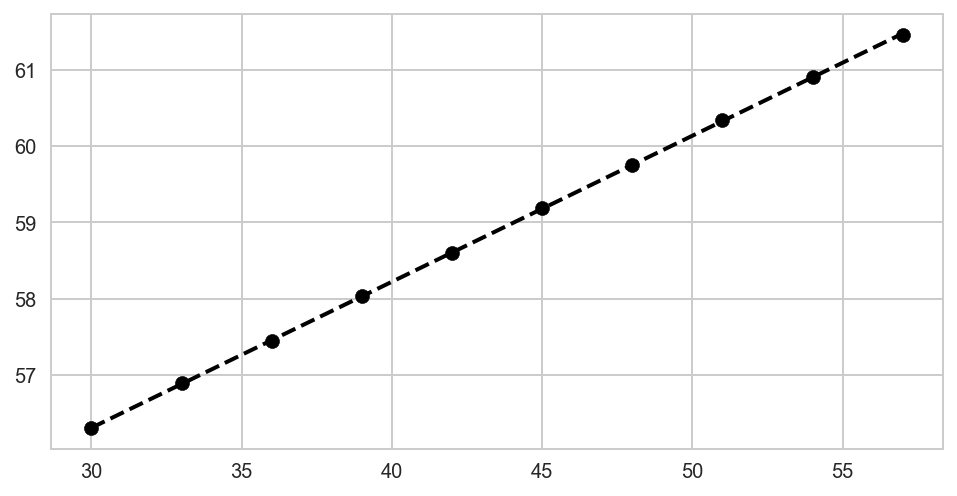

In [14]:
l_data = {
    'Us'   : 1.3,
    'R2'   : 50,
    'R3'   : 50,
    'R1_0' : 56.30,
    '_t_l' : make3(30),
    '_U_l' : il("0+3.4+6.6+10.0+13.3+16.7+20.0+23.3+26.6+29.8")
}
l_bridge(**l_data)

# 使用立式电桥测量热敏电阻

In [15]:
def s_bridge(Us, R1, R2, R3_0, _t_l, _U_l):
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    R_ = R1
    R = R3_0
    d_Rx = ((R+R_)**2 * U_l * 10**-3) / (R_*Us - (R+R_)*U_l*10**-3)
    Rx_l = np.round(R3_0 + d_Rx, 2)
    tr_Rx_l = np.log(Rx_l)
    T_l = t_l + 273
    tr_T_l = 1 / T_l
    item_list = [t_l, U_l, d_Rx, Rx_l, T_l, tr_Rx_l, tr_T_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值','T(=t+273)', 'ln(R_x)', '1/T']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list[:-2]:
            print("%.2f" % ll[i], end='\t    ')
        print("%.4f" % item_list[-2][i], end='\t    ')
        print("%.6f" % item_list[-1][i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['figure.dpi'] = 144
    plt.subplot(211)
    plt.scatter(T_l, Rx_l, color='black')
    plt.plot(T_l, Rx_l, color='black', linestyle='-')
    plt.subplot(212)
    L = tr_T_l.min()
    H = tr_T_l.max()
    d = (H - L) / 10
    plt.xlim(L - d, H + d)
    plt.scatter(tr_T_l, tr_Rx_l, color='black')
    A = np.vstack([tr_T_l, np.ones(len(tr_T_l))]).T
    m, c = np.linalg.lstsq(A, np.array(tr_Rx_l), rcond=1)[0]
    plt.plot(tr_T_l, m * tr_T_l + c, linewidth=2, color='black', linestyle='--')
    print("ln(R_x) = %.1f * (1/T) + (%.4f)" % (m, c))
    R_0 = np.exp(c)
    B_n = m
    print("R_x = R_0 * e^(B_n/T) = %.3f * e^(%.1f/T)" % (R_0, B_n))
    print("R_0 = %.3f, B_n = %.1f" % (R_0, B_n))

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `R3_0` : R3初始测量值
5. `_t_l` : 温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    T(=t+273)	    ln(R_x)	    1/T	    
---------------------------------------------------------------------------------------------------------------
#0	30.00	    0.00	    0.00	    2462.00	    303.00	    7.8087	    0.003300	    
#1	33.00	    -4.60	    -212.95	    2249.05	    306.00	    7.7183	    0.003268	    
#2	36.00	    -10.30	    -432.31	    2029.69	    309.00	    7.6156	    0.003236	    
#3	39.00	    -16.40	    -625.79	    1836.21	    312.00	    7.5155	    0.003205	    
#4	42.00	    -23.10	    -801.47	    1660.53	    315.00	    7.4149	    0.003175	    
#5	45.00	    -30.40	    -959.86	    1502.14	    318.00	    7.3146	    0.003145	    
#6	48.00	    -38.10	    -1098.72	    1363.28	    321.00	    7.2176	    0.003115	    
#7	51.00	    -46.30	    -1222.37	    1239.63	    324.00	    7.1226	    0.003086	    
#8	54.00	    -55.40	    -1337.22	    1124.78	    327.00	    7.0253	    0.003058	    
#9	57.00	    -65.00	    -1438.81	    1023.19	    330.00

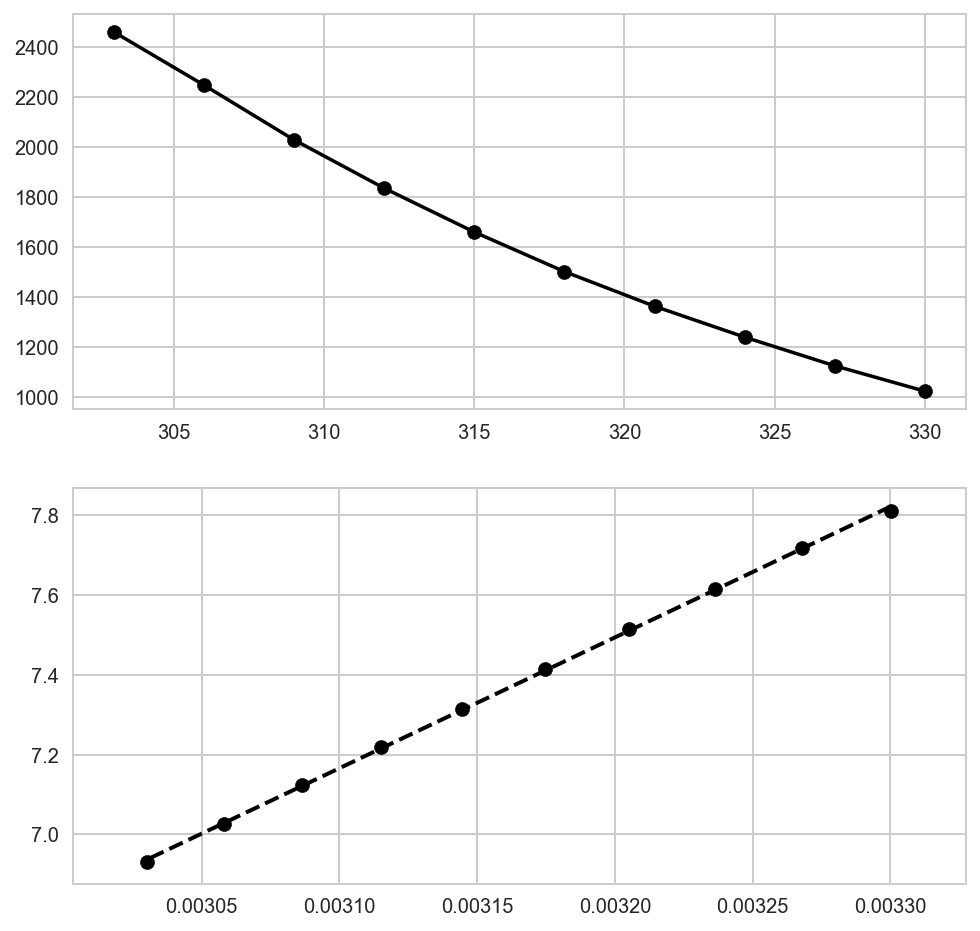

In [16]:
s_data = {
    'Us'   : 1.3, 
    'R1'   : 100, 
    'R2'   : 100, 
    'R3_0' : 2462.00, 
    '_t_l' : make3(30), 
    '_U_l' : il("0+-4.6+-10.3+-16.4+-23.1+-30.4+-38.1+-46.3+-55.4+-65.0")
}
s_bridge(**s_data)